In [1]:
# dataset :ingredients.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ingredients.csv')
df

,sweetness,crunchiness,ingredients,class
0,1,1,cheese,protein
1,3,1,fish,protein
2,2,2,shrimp,protein
3,1,4,bacon,protein
4,3,5,nuts,protein
5,1,9,lettuce,vegetable
6,2,8,cucumber,vegetable
7,3,7,green bean,vegetable
8,5,10,carrot,vegetable
9,3,10,celery,vegetable


In [4]:
import warnings
warnings.filterwarnings('ignore')

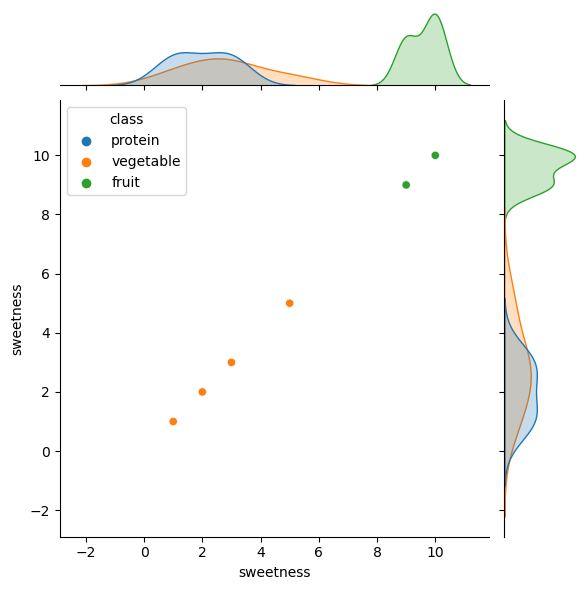

In [6]:
sns.jointplot(x='sweetness' , y= 'sweetness',data = df,hue = 'class')

In [7]:
# separate input and output

x = df[['sweetness', 'crunchiness']]

y = df['class']

## build the model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
clf = KNeighborsClassifier(n_neighbors = 4)

In [10]:
clf.fit(x,y)

KNeighborsClassifier(n_neighbors=4)

In [11]:
clf.predict([[6, 4]])

array(['fruit'], dtype=object)

### finding right k

In [12]:
from sklearn.model_selection import train_test_split 

In [17]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,random_state = 0,
                                                    test_size=0.25)

In [15]:
x_train

,sweetness,crunchiness
14,10,2
4,3,5
2,2,2
13,9,2
10,10,9
7,3,7
11,10,7
3,1,4
0,1,1
5,1,9


In [16]:
y_train

14        fruit
4       protein
2       protein
13        fruit
10        fruit
7     vegetable
11        fruit
3       protein
0       protein
5     vegetable
12        fruit
Name: class, dtype: object

In [18]:
x_train.shape

(11, 2)

In [19]:
y_train.shape

(11,)

In [21]:
error = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [22]:
error

[0.0, 0.0, 0.0, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0]

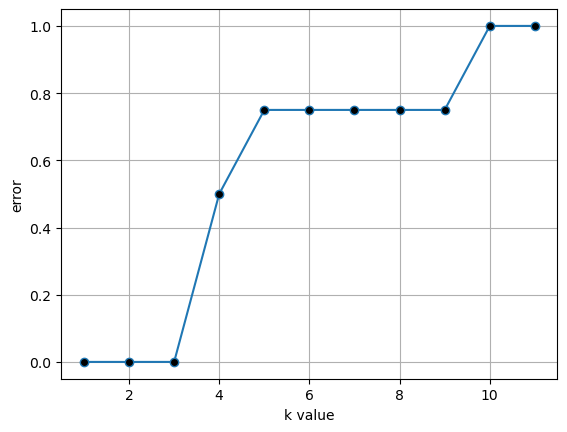

In [24]:
# plot

plt.xlabel('k value')
plt.ylabel('error')

plt.plot(range(1,12), error,marker= 'o',mfc = 'black')
plt.grid();